## Preprocesamiento de datos

En este notebook vamos a trabajar algunas operaciones de preprocesamiento básico que forma parte del proceso de Análisis Inteligente de Datos usando Pandas de Python. 

Repositorio público de este notebook: https://github.com/CarmenGarridoC/curso-notebooks

Link en Binder: 

Vamos a trabajar con la base de datos Iris que se proporciona en formato csv. La base de datos tiene 4 atributos numéricos y un atributo clase.

In [1]:
import pandas as pd
import numpy as np
fichero1 = pd.read_csv("iris.csv",delimiter=',', names=['Atr1','Atr2','Atr3','Atr4','Clase']);
fichero1

,Atr1,Atr2,Atr3,Atr4,Clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Descripción estadística básica de los datos

Es interesante conocer valores descriptivos básicos de los datos como la media, mediana, cuartiles, etc.

In [2]:
fichero1.describe()

,Atr1,Atr2,Atr3,Atr4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Valores missing

Debemos conocer si la base de datos contiene valores missing en algunos de sus atributos ya que esto conlleva realizar un preprocesamiento distinto para imputar dichos valores.

In [3]:
#datos missing
fichero1.isna().sum()

Atr1     0
Atr2     0
Atr3     0
Atr4     0
Clase    0
dtype: int64

# Análisis de correlación

Otro elemento importante en la etapa de preprocesamiento es hacer un análisis de correlación entre variables numéricas. De esta forma si dos atributos tiene una correlación muy alta significa que no están proporcionando la misma información y podemos eliminar uno de ellos.

In [4]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = fichero1.select_dtypes(include=['float64', 'int']).corr(method='spearman')
tidy_corr_matrix(corr_matrix).head(50)

,variable_1,variable_2,r,abs_r
11,Atr3,Atr4,0.936003,0.936003
14,Atr4,Atr3,0.936003,0.936003
2,Atr1,Atr3,0.881386,0.881386
8,Atr3,Atr1,0.881386,0.881386
3,Atr1,Atr4,0.834421,0.834421
12,Atr4,Atr1,0.834421,0.834421
6,Atr2,Atr3,-0.303421,0.303421
9,Atr3,Atr2,-0.303421,0.303421
7,Atr2,Atr4,-0.277511,0.277511
13,Atr4,Atr2,-0.277511,0.277511


También podemos crear la matriz de correlaciones que nos da esta información de forma más visual.

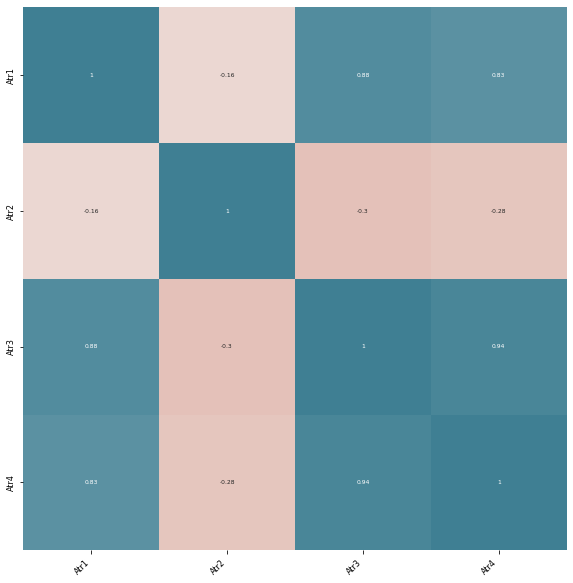

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)


De acuerdo a los resultados obtenidos, ¿eliminarías algún atributo?

# Balanceo del atributo clase

Podemos obtener información de la distribución del atributo clase lo que nos permite saber si las clases están balanceadas o no.

In [6]:
fichero1.Clase.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Clase, dtype: int64

También podemos obtener esta información mediante un gráfico de barras del atributo clase.

<AxesSubplot:xlabel='Clase'>

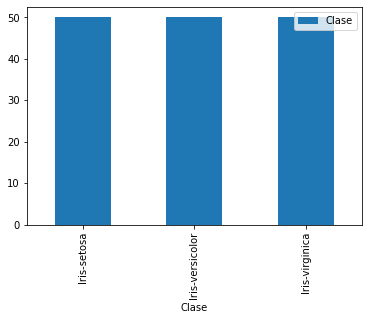

In [11]:
datosB = pd.DataFrame((fichero1.iloc[:,4]).groupby(fichero1.iloc[:,4]).count())
datosB.plot(kind='bar')

# Representación gráfica de atributos

También es importante analizar los atributos de nuestra base de datos apoyándonos en gráficos que muestran relaciones estre ellos.

Veremos cómo realizar un diagrama scatter de dos atributos numéricos 


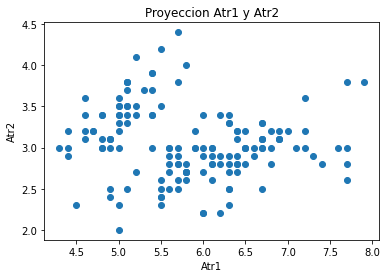

In [7]:
# Scatter
plt.scatter(fichero1.Atr1,fichero1.Atr2)
plt.xlabel("Atr1")
plt.ylabel("Atr2")
plt.title("Proyección Atr1 y Atr2")
plt.show()